In [2]:
import pandas as pd
import numpy as np

In [35]:
a,b,c,d,e,f,g,h = np.loadtxt('C:/Users/cshi/OneDrive - University of Connecticut/2019-20_Fall/First_Year_Project/Random Forest/WineQualityRed/FindMaxClique/BuildGraphInstances/RandomForestsInstances/S1.txt', skiprows = 1, unpack = True)

In [45]:
SplitIndex = a.astype('int')
TreeIndex = b.astype('int')
LeafIndex = c.astype('int')
LeafValue = d.astype('float')
SplitFeature = e.astype('int')
SplitSign = f.astype('int')
SplitCriterion = g.astype('float')
SplitNodeIndex = h.astype('int')

In [51]:
SplitData = np.array([SplitIndex, TreeIndex, LeafIndex, LeafValue, SplitFeature, SplitSign, SplitCriterion, SplitNodeIndex], dtype = object)

In [52]:
SplitData.shape

(8, 240)

In [53]:
SplitData

array([[0, 1, 2, ..., 237, 238, 239],
       [0, 0, 0, ..., 9, 9, 9],
       [0, 0, 0, ..., 7, 7, 7],
       ...,
       [0, 0, 0, ..., 1, 1, 1],
       [10.15, 0.5749, 10.55, ..., 0.0589, 0.865, 10.65],
       [2, 1, 0, ..., 6, 4, 0]], dtype=object)

In [106]:
len(np.unique(SplitData[1])) #number of trees in the random forests
len(np.unique(np.where((SplitData[1] == 0)))) #number of split rules in tree_0
np.unique(SplitData[2][np.where((SplitData[1] == 0))]) #number of leaves of tree_0

24

In [120]:
x = np.where((SplitData[1] == 0) * (SplitData[2] == 1))
x[0]
#x[0]: generate Split Index for leaves, Leaf ID = (SplitData[1] == i) * (SplitData[2] == j), i: Tree Index, j: Leaf Index 
#len(x[0]) 
#Split Index of splits for that leaf

array([3, 4, 5], dtype=int64)

In [ ]:
#function of checking whether two rules(intervals) have non-empty intersection
def Intersection(rule_a, rule_b):
    if rule_a[0] == rule_b[0]:
        if rule_a[1] == rule_b[1]:
            return True
        else:
            if rule_a[1] == 1:
                if rule_a[2] < rule_b[2]:
                    return True
                else:
                    return False
            else:
                if rule_a[2] > rule_b[2]:
                    return True
                else:
                    return False
    else:
        return True

In [ ]:
#checking whether two sets of rules have non-empty intersection
def Consistency(rule_set_a, rule_set_b):
    while True:
        for a in rule_set_a:
            for b in rule_set_b:
                if Intersection(a, b) == True:
                    continue
                else:
                    return False
        return True

In [270]:
# Generate main-graphs:
# For each leaf node of the main tree, find all the leaf nodes from sibling trees that are consistent with that leaf node.
Main_TreeIndex = 0
Vertices_Main = {}
Edges_Main = {} # not necessary
for i in range(len(np.unique(SplitData[2][np.where((SplitData[1] == Main_TreeIndex))]))): # leaf nodes in the main tree
    Vertices_Main[i] = []
    Edges_Main[i] = []
    Vertices_Main[i].append([str('n'), Main_TreeIndex, i, SplitData[3][np.where((SplitData[1] == Main_TreeIndex) * (SplitData[2] == i))[0]][0]])
    
    #Split rules for leaf[0, i], SplitData[1] == 0, SplitData[2] == i
    leaf_split_feature = SplitData[4][np.where((SplitData[1] == Main_TreeIndex) * (SplitData[2] == i))[0]] # Split Feature
    leaf_split_sign = SplitData[5][np.where((SplitData[1] == Main_TreeIndex) * (SplitData[2] == i))[0]] # Split Sign
    leaf_split_criterion = SplitData[6][np.where((SplitData[1] == Main_TreeIndex) * (SplitData[2] == i))[0]] # Split Criterion
    Rules_Leaf_Main_Tree = np.transpose(np.array([leaf_split_feature, leaf_split_sign, leaf_split_criterion], dtype = object))
    #Go to sibling trees
    for j in range(1, len(np.unique(SplitData[1]))):
        for k in range(len(np.unique(SplitData[2][np.where((SplitData[1] == j))]))):
            leaf_split_feature = SplitData[4][np.where((SplitData[1] == j) * (SplitData[2] == k))[0]] # Split Feature
            leaf_split_sign = SplitData[5][np.where((SplitData[1] == j) * (SplitData[2] == k))[0]] # Split Sign
            leaf_split_criterion = SplitData[6][np.where((SplitData[1] == j) * (SplitData[2] == k))[0]] # Split Criterion
            Rules_Leaf_Sibling_Tree = np.transpose(np.array([leaf_split_feature, leaf_split_sign, leaf_split_criterion], dtype = object))
            if Consistency(Rules_Leaf_Main_Tree, Rules_Leaf_Sibling_Tree) == True:
                Vertices_Main[i].append([str('n'), j, k, SplitData[3][np.where((SplitData[1] == j) * (SplitData[2] == k))[0]][0]])
                Edges_Main[i].append([str('e'), Main_TreeIndex, i, j, k])

                

In [307]:
# Create sub-graph:
# For each Vertice_Main[i], check consistency among the leaf nodes other than the leaf node from the main tree
Vertices_Sub = {}
Edges_Sub = {}
Main_graph = {}
for i in range(len(np.unique(SplitData[2][np.where((SplitData[1] == Main_TreeIndex))]))): # leaf nodes in the main tree
    Main_graph[i] = np.array(Vertices_Main[i], dtype = object) # Transform generated vertices from list to array
    exclude = [i] # 0 is tree index of main tree, 
    for j in np.delete(np.unique(Main_graph[i][:, 1]), i): # Start from nodes that not from the main tree
        exclude.append(j)
        for k in np.delete(np.unique(Main_graph[i][:, 1]), exclude):
    
            print (k)
        
        

2
3
4
5
6
7
8
9
3
4
5
6
7
8
9
4
5
6
7
8
9
5
6
7
8
9
6
7
8
9
7
8
9
8
9
9
2
3
4
5
6
7
8
9
3
4
5
6
7
8
9
4
5
6
7
8
9
5
6
7
8
9
6
7
8
9
7
8
9
8
9
9
1
3
4
5
6
7
8
9
3
4
5
6
7
8
9
4
5
6
7
8
9
5
6
7
8
9
6
7
8
9
7
8
9
8
9
9
1
2
4
5
6
7
8
9
2
4
5
6
7
8
9
4
5
6
7
8
9
5
6
7
8
9
6
7
8
9
7
8
9
8
9
9
1
2
3
5
6
7
8
9
2
3
5
6
7
8
9
3
5
6
7
8
9
5
6
7
8
9
6
7
8
9
7
8
9
8
9
9
1
2
3
4
6
7
8
9
2
3
4
6
7
8
9
3
4
6
7
8
9
4
6
7
8
9
6
7
8
9
7
8
9
8
9
9
1
2
3
4
5
7
8
9
2
3
4
5
7
8
9
3
4
5
7
8
9
4
5
7
8
9
5
7
8
9
7
8
9
8
9
9
1
2
3
4
5
6
8
9
2
3
4
5
6
8
9
3
4
5
6
8
9
4
5
6
8
9
5
6
8
9
6
8
9
8
9
9


In [293]:
np.delete(np.unique(np.array(Vertices_Main[0], dtype = object)[:, 1]), [0,1])

array([2, 3, 4, 5, 6, 7, 8, 9], dtype=object)

In [302]:
np.delete(np.unique(np.array(Vertices_Main[0], dtype = object)[:, 1]), exclude)

array([2, 3, 4, 5, 6, 7, 8, 9], dtype=object)

In [305]:
exclude = [0] # 0 is tree index of main tree, 
Main_graph[0] = np.array(Vertices_Main[0], dtype = object)
for j in np.delete(np.unique(Main_graph[0][:, 1]), 0): # Start from nodes of Sibling tree 1
    
    exclude.append(j)
    for k in # for every nodes from sibling tree 1
    #Split rules for leaf[j, i], SplitData[1] == 0, SplitData[2] == i
    leaf_split_feature = SplitData[4][np.where((SplitData[1] == Main_TreeIndex) * (SplitData[2] == i))[0]] # Split Feature
    leaf_split_sign = SplitData[5][np.where((SplitData[1] == Main_TreeIndex) * (SplitData[2] == i))[0]] # Split Sign
    leaf_split_criterion = SplitData[6][np.where((SplitData[1] == Main_TreeIndex) * (SplitData[2] == i))[0]] # Split Criterion
    Rules_Leaf_Sibling_1_Tree = np.transpose(np.array([leaf_split_feature, leaf_split_sign, leaf_split_criterion], dtype = object))
    for k in np.delete(np.unique(np.array(Vertices_Main[0], dtype = object)[:, 1]), exclude):
        leaf_split_feature = SplitData[4][np.where((SplitData[1] == j) * (SplitData[2] == k))[0]] # Split Feature
        leaf_split_sign = SplitData[5][np.where((SplitData[1] == j) * (SplitData[2] == k))[0]] # Split Sign
        leaf_split_criterion = SplitData[6][np.where((SplitData[1] == j) * (SplitData[2] == k))[0]] # Split Criterion
        Rules_Leaf_Sibling2_Tree = np.transpose(np.array([leaf_split_feature, leaf_split_sign, leaf_split_criterion], dtype = object))

        if Consistency(Rules_Leaf_Sibling_1_Tree, Rules_Leaf_Sibling_2_Tree) == True:
            Vertices_Sub[i].append([str('n'), j, k, SplitData[3][np.where((SplitData[1] == j) * (SplitData[2] == k))[0]][0]])
            Edges_Sub[i].append([str('e'), Main_TreeIndex, i, j, k])
        print (k)

2
3
4
5
6
7
8
9
3
4
5
6
7
8
9
4
5
6
7
8
9
5
6
7
8
9
6
7
8
9
7
8
9
8
9
9


In [312]:
np.array(Vertices_Main[0], dtype = object)[np.where(np.array(Vertices_Main[0], dtype = object)[:, 1] == 2)]

array([['n', 2, 0, 5.1398],
       ['n', 2, 1, 3.0]], dtype=object)

In [271]:
Vertices_Main[0] # All the leaf nodes from sibling trees that are consistent with leaf[0,0]
Edges_Main[0]

[['n', 0, 0, 5.0874],
 ['n', 1, 0, 5.5681],
 ['n', 1, 2, 5.4071],
 ['n', 1, 3, 4.7192],
 ['n', 2, 0, 5.1398],
 ['n', 2, 1, 3.0],
 ['n', 3, 0, 5.1404],
 ['n', 3, 1, 5.4795],
 ['n', 4, 0, 5.1884],
 ['n', 4, 1, 4.3043],
 ['n', 5, 0, 5.1636],
 ['n', 5, 1, 3.3333],
 ['n', 6, 0, 5.8909],
 ['n', 6, 2, 4.9407],
 ['n', 6, 3, 5.3248],
 ['n', 7, 0, 6.025],
 ['n', 7, 1, 7.2857],
 ['n', 7, 2, 5.1259],
 ['n', 7, 3, 5.4642],
 ['n', 8, 0, 5.2767],
 ['n', 8, 1, 4.3913],
 ['n', 9, 0, 5.1645],
 ['n', 9, 1, 4.3333]]

In [155]:
#Split rules for leaf[i, j], SplitData[1] == i, SplitData[2] == j
leaf_1_split_feature = SplitData[4][np.where((SplitData[1] == 0) * (SplitData[2] == 0))[0]] # Split Feature

In [156]:
leaf_1_split_sign = SplitData[5][np.where((SplitData[1] == 0) * (SplitData[2] == 0))[0]] # Split Sign

In [157]:
leaf_1_split_criterion = SplitData[6][np.where((SplitData[1] == 0) * (SplitData[2] == 0))[0]] # Split Criterion

In [171]:
Rules_1 = np.transpose(np.array([leaf_1_split_feature, leaf_1_split_sign, leaf_1_split_criterion], dtype = object))
Rules_1 # set of rules of leaf[0,0]

array([[10, 0, 10.15],
       [9, 0, 0.5749],
       [10, 0, 10.55]], dtype=object)

In [161]:
#Split rules for leaf[i, j], SplitData[1] == i, SplitData[2] == j
leaf_2_split_feature = SplitData[4][np.where((SplitData[1] == 1) * (SplitData[2] == 0))[0]] # Split Feature

In [162]:
leaf_2_split_sign = SplitData[5][np.where((SplitData[1] == 1) * (SplitData[2] == 0))[0]] # Split Sign

In [163]:
leaf_2_split_criterion = SplitData[6][np.where((SplitData[1] == 1) * (SplitData[2] == 0))[0]] # Split Criterion

In [214]:
Rules_2 = np.transpose(np.array([leaf_2_split_feature, leaf_2_split_sign, leaf_2_split_criterion], dtype = object))
Rules_2 # set of rules of leaf[1,0]

array([[9, 0, 0.675],
       [1, 0, 0.405],
       [10, 0, 11.55]], dtype=object)

In [177]:
#Split rules for leaf[1, 1], SplitData[1] == 1, SplitData[2] == 1, consistency with leaf[0,0] should be False
leaf_3_split_feature = SplitData[4][np.where((SplitData[1] == 1) * (SplitData[2] == 1))[0]] # Split Feature
leaf_3_split_sign = SplitData[5][np.where((SplitData[1] == 1) * (SplitData[2] == 1))[0]] # Split Sign
leaf_3_split_criterion = SplitData[6][np.where((SplitData[1] == 1) * (SplitData[2] == 1))[0]] # Split Criterion
Rules_3 = np.transpose(np.array([leaf_3_split_feature, leaf_3_split_sign, leaf_3_split_criterion], dtype = object))
Rules_3 # set of rules of leaf[1,0]

array([[9, 1, 0.675],
       [1, 0, 0.405],
       [10, 0, 11.55]], dtype=object)

In [150]:
#function of checking whether two rules(intervals) have non-empty intersection
def Intersection(rule_a, rule_b):
    if rule_a[0] == rule_b[0]:
        if rule_a[1] == rule_b[1]:
            return True
        else:
            if rule_a[1] == 1:
                if rule_a[2] < rule_b[2]:
                    return True
                else:
                    return False
            else:
                if rule_a[2] > rule_b[2]:
                    return True
                else:
                    return False
    else:
        return True

In [225]:
#checking whether two sets of rules have non-empty intersection
def Consistency(rule_set_a, rule_set_b):
    while True:
        for a in rule_set_a:
            for b in rule_set_b:
                if Intersection(a, b) == True:
                    continue
                else:
                    return False
        return True

In [235]:
if Consistency(Rules_1, Rules_2) == True:
    print (Rules_1)

[[10 0 10.15]
 [9 0 0.5749]
 [10 0 10.55]]


In [226]:
Consistency(Rules_1, Rules_2)

True

In [227]:
Consistency(Rules_1, Rules_3)

False

In [215]:
rule_test1 = np.array([1, 0, 0.5749], dtype=object)
rule_test2 = np.array([9, 1, 0.675], dtype=object)
Intersection(rule_test1, rule_test2)

True

In [133]:
rule_test1 = np.array([10, 0, 10.15], dtype=object)

In [134]:
rule_test1[0]

10

In [97]:
#with Tree Index and Leaf Index, we can locate the rules of that leaf.
#[3]: Column in Split table, which is Leaf Value
#x[0]: generate Split Index for leaves, Leaf ID = (SplitData[1] == i) * (SplitData[2] == j), i: Tree Index, j: Leaf Index  
#[0]: make sure it is the first of that leaf's split information
SplitData[3][x[0][0]] # Leaf Value

5.55

In [ ]:
SplitData[4][x[0][0]]

In [ ]:
ArbitraryTreeIndex = 0
for i in 


In [ ]:
for i in len

In [8]:
import networkx as nx
import math
import matplotlib.pyplot as plt

In [16]:
G = nx.Graph()
G_w = nx.Graph()

In [15]:
elist = [(x, 2), (2, 3), (1, 4), (4, 2)]
G.add_edges_from(elist)

NameError: name 'x' is not defined

In [18]:
elist_w = [('a', 'b', 5.0), ('b', 'c', 3.0), ('a', 'c', 1.0), ('c', 'd', 7.3)]
G_w.add_weighted_edges_from(elist_w)

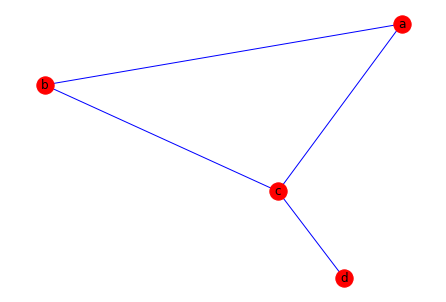

In [19]:
nx.draw(G_w, node_color='r', edge_color='b', with_labels = True)

In [5]:
f=open("binfile.bin","wb")
num=[5, 10, 15, 20, 25]
arr=bytearray(num)
f.write(arr)
f.close()

In [6]:
f=open("binfile.bin","rb")
num=list(f.read())
print (num)
f.close()

[5, 10, 15, 20, 25]


In [7]:
Data = pd.read_csv('C:/Users/cshi/OneDrive - University of Connecticut/2019-20_Fall/First_Year_Project/Random Forest/WineQualityRed/FindMaxClique/BuildGraphInstances/RandomForestsInstances/keller4.clq
                ')


SyntaxError: EOL while scanning string literal (<ipython-input-7-1f8cf1d1f015>, line 1)